# FORZA IN FUNZIONE DELLA DISTANZA

fissiamo la tensione e variamo la distanza delle sfere (raccolte 7 distanze 3 volte l'una)

In [29]:
import numpy as np
import pandas as pd
import os
from interpolazione3 import b_std

FILE = os.path.abspath('') + '/../CSV/' + 'forza_distanza_A.csv'

fr = pd.read_csv(FILE)  # fileread
d = np.array(fr["d(cm)"])/ 100 # m
teta1 = np.array(fr["teta1"]) # deg
teta2 = np.array(fr["teta2"])
teta3 = np.array(fr["teta3"])
raggio = 0.017 # raggio delle sfere in m

# correzione per cariche non puntiformi
correzione = 1 - ((4 * np.power(raggio, 3)) / d ** 3)

#valore medio
teta = np.array([np.average([teta1[i],teta2[i],teta3[i]]) for i in range(0,len(teta1))],dtype=np.float64)
# deviazione standard propagata con sensibilità dello strumento (2 deg)
sigma_teta = np.array([np.sqrt(b_std([teta1[i],teta2[i],teta3[i]])**2+1**2) for i in range(0,len(teta1))],dtype=np.float64)

teta = teta / correzione # corretto teta per carica non puntiforme
sigma_teta = sigma_teta / correzione

#conversione in radianti
teta = teta * np.pi / 180 # rad MEDIA
sigma_teta = sigma_teta * np.pi / 180 # rad DEVIAZIONE STANDARD


### verifica $\theta \propto \frac{1}{r^2}$

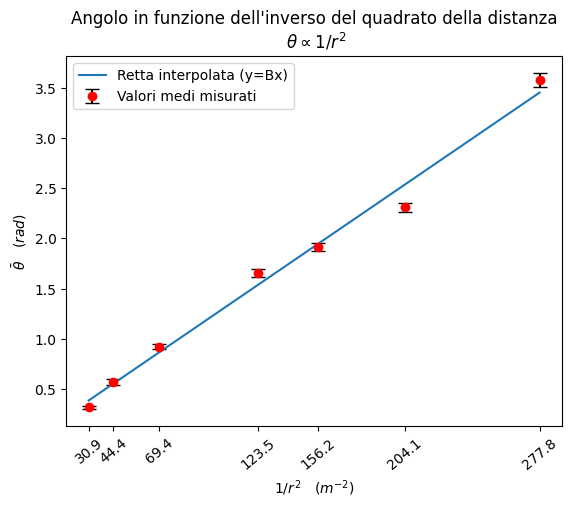


linearità BX
    
B: 0.012433912099555739
sigmaB 0.0003533692761839588

sigmaY: [0.07010904 0.04659266 0.04191549 0.04142332 0.02496662 0.03205184
 0.0175123 ]
chiquadro ridotto: 9.46
df: 6
pvalue: 14.9%


In [30]:
from matplotlib import pyplot as plt
from interpolazione3 import RettaInterpolataB # y = BX

x = 1 / d**2
r = RettaInterpolataB(x,teta,sigma_teta)

plt.title("Angolo in funzione dell'inverso del quadrato della distanza\n $"+chr(92)+"theta \propto 1/r^2$")
plt.errorbar(x,teta,yerr=r.sigmaY,color='red',ecolor='black',fmt='o',capsize=5, label="Valori medi misurati")
plt.plot(r.x_best,r.y_best,label="Retta interpolata (y=Bx)")
plt.xticks(x, rotation=40)
plt.xlabel("$1/r^2 \quad (m^{-2})$")
plt.ylabel("$\\bar{\\theta} \quad (rad)$")
plt.legend()
plt.show()

print(r)